# Oximeter Design Program

In [35]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("data/oximeter/WatchMoving.csv")
red = data.iloc[:, 0].values.tolist()
ir = data.iloc[:, 1].values.tolist()
time = np.linspace(0, len(ir)*0.02, len(ir)).tolist()

### Raw IR Signal Plot

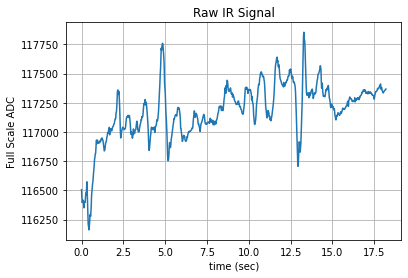

In [36]:
plt.plot(time, ir)
plt.xlabel("time (sec)")
plt.ylabel("Full Scale ADC")
plt.title("Raw IR Signal")
plt.grid()
plt.show()

### Raw Red Signal Plot

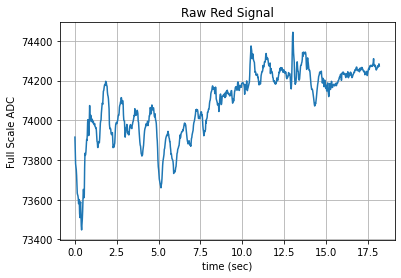

In [37]:
plt.plot(time, red)
plt.xlabel("time (sec)")
plt.ylabel("Full Scale ADC")
plt.title("Raw Red Signal")
plt.grid()
plt.show()

### Low Pass Filter

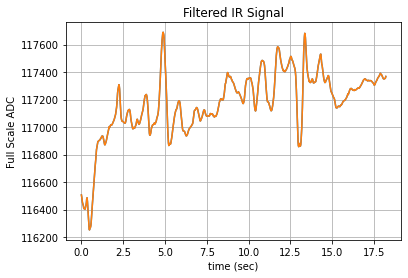

In [38]:
def lpf(x, omega_c, T):
    N = len(x)-1
    y = x
    alpha = (2-T*omega_c)/(2+T*omega_c)
    beta = T*omega_c/(2+T*omega_c)
    for k in range(1, N):
        y[k] = alpha*y[k-1] + beta*(x[k]+x[k-1])
    return y

omega = 2.0 * np.pi * 5.0 # Cut-off Frequency
T = 0.02 # Sampling time

lpf_ir = lpf(ir, omega, T)
plt.plot(time, lpf_ir)
plt.plot(time, ir)
plt.xlabel("time (sec)")
plt.ylabel("Full Scale ADC")
plt.title("Filtered IR Signal")
plt.grid()
plt.show()

### Remove Mean

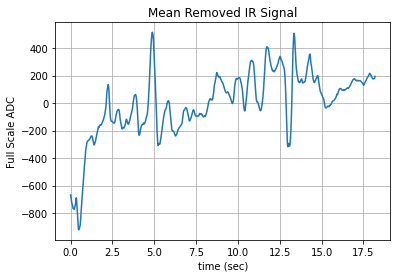

In [39]:
mean = 0 
for i, m in enumerate(lpf_ir):
    mean += m
mean = mean / len(lpf_ir)
for i, m in enumerate(lpf_ir):
    lpf_ir[i] = lpf_ir[i] - mean

plt.plot(time, lpf_ir)
plt.xlabel("time (sec)")
plt.ylabel("Full Scale ADC")
plt.title("Mean Removed IR Signal")
plt.grid()
plt.show()

### Autocorrelate

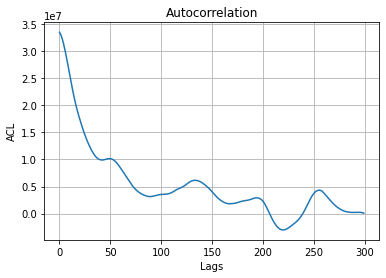

In [45]:
NUM_AUTOCORR_LAGS = 300
autocorr_buff = [] 
for lag in range(NUM_AUTOCORR_LAGS):
    temp_autocorr = 0.0
    for i in range(NUM_AUTOCORR_LAGS - lag):
        temp_autocorr += lpf_ir[i] * lpf_ir[i + lag]
    autocorr_buff.append(temp_autocorr)

t = []
for i in range(NUM_AUTOCORR_LAGS):
    t.append(i)
    
plt.plot(t, autocorr_buff)
plt.xlabel("Lags")
plt.ylabel("ACL")
plt.title("Autocorrelation")
plt.grid()
plt.show()

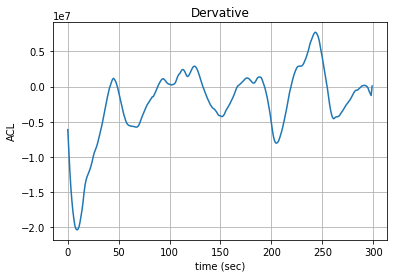

In [44]:
der = autocorr_buff.copy()
for k in range(len(der)-1):
    der[k] = (der[k+1]-der[k])/0.05
    
plt.plot(t, der)
plt.xlabel("time (sec)")
plt.ylabel("ACL")
plt.title("Dervative")
plt.grid()
plt.show()

Peak Found Up: 42,241261.9444506988
Peak Found Up: 89,203593.8335526269
Peak Found Up: 167,84942.61500713415
Peak Found Up: 220,454946.6703453567
Peak Found Up: 289,82798.82653441513
Steps Found: 5


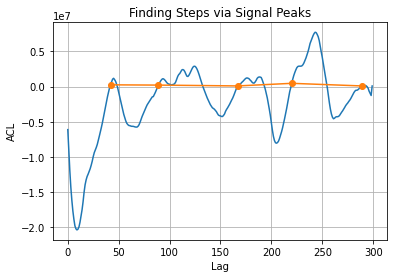

In [47]:
PEAK_QUALITY = 0.5
peaks = []
index_peaks = []
sign_positive = False
sign_negative = False
for k in range(len(der)-1):
    if der[k]>0 and sign_positive == False and sign_negative == True:
        if der[k+1] > PEAK_QUALITY:
            print("Peak Found Up: " + str(k) + "," + str(der[k]))
            peaks.append(der[k])
            index_peaks.append(k)
    
    if der[k] < 0:
        sign_negative = True
        sign_positive = False
        
    
    if der[k] > 0:
        sign_positive = True
        sign_negative = False
        
print("Steps Found: " + str(len(peaks)))
        
plt.plot(t, der)
plt.plot(index_peaks, peaks, '-o')
plt.xlabel("Lag")
plt.ylabel("ACL")
plt.title("Finding Steps via Signal Peaks")
plt.grid()
plt.show()